#Patel Mahi Govindbhai - D24AIML089

#Goal: PREDICT ONLINE PURCHASE INTENT – CUSTOMER BEHAVIOUR MODELING

# Project Overview: Predicting Online Purchase Intent – A KNN-Based Approach to Customer Behaviour Modeling

## - Objective:
The main goal of this project was to predict whether an online shopper would complete a purchase based on their session behavior, using machine learning techniques — primarily the K-Nearest Neighbors (KNN) algorithm.

## Key Techniques and Concepts Applied:
- Data preprocessing including encoding categorical variables, handling boolean columns, and feature scaling using standardization.
- Splitting data into training and test sets using stratified sampling to maintain class balance.
- Training and evaluating a baseline KNN classifier, followed by tuning the number of neighbors (`k`) to understand the bias-variance tradeoff.
- Demonstrating the **curse of dimensionality** by adding noise features and observing the impact on KNN performance.
- Using **Principal Component Analysis (PCA)** to reduce feature dimensions and improve efficiency.
- Comparing KNN with other machine learning models like Logistic Regression, Decision Tree, and Random Forest.
- Handling **class imbalance** using **SMOTE (Synthetic Minority Over-sampling Technique)** to generate more examples of the minority (purchase) class.
- Visualizing results using plots (accuracy curves, confusion matrices, ROC curves) and interpreting key performance metrics such as precision, recall, F1-score, and ROC-AUC.

Step 1: Importing the Libraries

- First, I imported all the necessary libraries such as pandas, numpy, matplotlib, seaborn, and scikit-learn modules.
- These libraries helped in data loading, preprocessing, visualization, modeling, and evaluation.

In [ ]:
#import require library for require to train model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE



# Step 2: Data Pre - Processing

In [ ]:
#Load online_shoppers_intention dataset
df = pd.read_csv('/content/online_shoppers_intention.csv')
print(df)

       Administrative  Administrative_Duration  Informational  \
0                   0                      0.0              0   
1                   0                      0.0              0   
2                   0                      0.0              0   
3                   0                      0.0              0   
4                   0                      0.0              0   
...               ...                      ...            ...   
12325               3                    145.0              0   
12326               0                      0.0              0   
12327               0                      0.0              0   
12328               4                     75.0              0   
12329               0                      0.0              0   

       Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                         0.0               1                 0.000000   
1                         0.0               2                64.000000 

In [ ]:
#print first five line from dataset
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [ ]:
#check shape of dataset
df.shape

(12330, 18)

In [ ]:
#check null value
df.isna().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


#Generate the summary statistic


In [ ]:
#load statistic summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [ ]:
#check columns of the data
df.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

# Step 3: Convert Text and Boolean Columns into Numbers

- Since machine learning models work only with numeric data, I converted all categorical columns into numbers.
- For example, I encoded the 'Month' and 'VisitorType' columns using label encoding.


In [ ]:
# Label Encoding categorical columns
le = LabelEncoder()
df['Month'] = le.fit_transform(df['Month'])
df['VisitorType'] = le.fit_transform(df['VisitorType'])
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)  # target variable


# Step 4: Splitting the Data for Training and Testing

- I split the dataset into training and testing sets using an 80-20 split.



In [ ]:
X = df.drop("Revenue", axis=1)
y = df["Revenue"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



# Step 5: Scale the Input Data to Prepare for Modeling

- Before applying the KNN algorithm, I standardized the feature values using `StandardScaler`.
- This is important for distance-based models like KNN.

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Step 6: Train a Logistic Regression Model and Make Predictions

- As a baseline, I trained a Logistic Regression model to predict the purchase intent.
- using accuracy, precision, recall, F1-score, and the confusion matrix.


In [ ]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log))


[[2042   42]
 [ 246  136]]
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466



# Step 7: Add Random Noise to Your Data and Test the Curse of Dimensionality

 In this, I explored how the addition of irrelevant features can negatively affect model performance.

## Why this matters:
- This helps illustrate the **curse of dimensionality** — a common issue in machine learning where adding too many features (especially irrelevant ones) leads to poor model performance.
- In high-dimensional spaces, distance-based algorithms like KNN struggle because the distance between points becomes less meaningful.

In [ ]:
np.random.seed(42)
noise = np.random.rand(X.shape[0], 50)  # add 50 noise features
X_noise = np.hstack((X, noise))


# Step 8: How KNN Performance Changes with Different Values of K

In this, I analyzed how the value of 'k' (the number of neighbors) affects the KNN model's performance.

## Here's what I did:
- I created two empty lists, `train_accuracies` and `test_accuracies`, to store accuracy scores for different k values.
- I then looped through k values from 1 to 20.

## The plot helps in:
- Identifying overfitting (high training accuracy but low testing accuracy)
- Identifying underfitting (low accuracy on both training and testing)



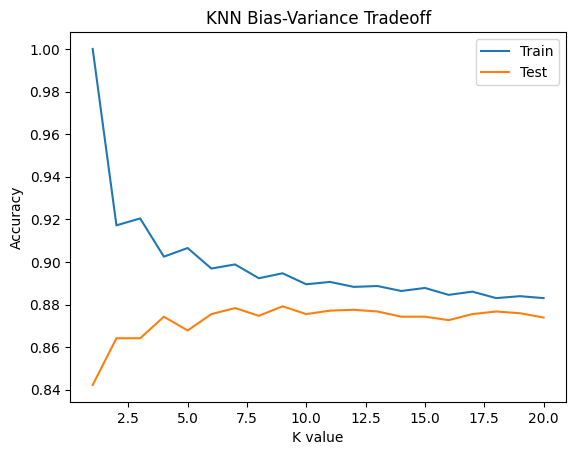

In [ ]:
train_accuracies = []
test_accuracies = []

for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_accuracies.append(knn.score(X_train_scaled, y_train))
    test_accuracies.append(knn.score(X_test_scaled, y_test))

plt.plot(range(1, 21), train_accuracies, label="Train")
plt.plot(range(1, 21), test_accuracies, label="Test")
plt.xlabel("K value")
plt.ylabel("Accuracy")
plt.legend()
plt.title("KNN Bias-Variance Tradeoff")
plt.show()


# Step 9: Use Cross-Validation to Check Model Performance More Reliably

- This helped me get a better estimate of how the model would perform on unseen data.


In [ ]:
cv_scores = cross_val_score(KNeighborsClassifier(n_neighbors=5), X, y, cv=5)
print(f"Cross-validation Accuracy: {cv_scores.mean()}")


Cross-validation Accuracy: 0.8592862935928629


# Step 10: Use PCA to Reduce the Number of Features and Train a KNN Model

 In this, I applied Principal Component Analysis (PCA) to reduce the dimensionality of the dataset before training the KNN model.

- I used `StandardScaler` again to ensure the features are standardized, which is important for PCA to work properly.
- Then, I applied PCA to the scaled data and selected a number of components that capture most of the variance in the data (e.g., 95%).

## Why this matters:
- PCA is especially useful for distance-based models like KNN, which can be negatively impacted by high-dimensional data.
- By reducing the number of features, I addressed part of the curse of dimensionality and made the data more manageable.




In [ ]:
pca = PCA(n_components=10)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(
    X_pca, y, test_size=0.2, stratify=y, random_state=42
)

knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_pca, y_train_pca)
print(classification_report(y_test_pca, knn_pca.predict(X_test_pca)))


              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2084
           1       0.53      0.28      0.36       382

    accuracy                           0.85      2466
   macro avg       0.70      0.62      0.64      2466
weighted avg       0.82      0.85      0.83      2466



# Step 11: Compare Multiple Machine Learning Models to Find the Best One

- I trained and evaluated several models including Logistic Regression, Decision Tree, Random Forest, and KNN.


In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "KNN": KNeighborsClassifier()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"--- {name} ---")
    print(classification_report(y_test, y_pred))


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2084
           1       0.76      0.36      0.49       382

    accuracy                           0.88      2466
   macro avg       0.83      0.67      0.71      2466
weighted avg       0.87      0.88      0.86      2466

--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2084
           1       0.55      0.56      0.55       382

    accuracy                           0.86      2466
   macro avg       0.73      0.74      0.73      2466
weighted avg       0.86      0.86      0.86      2466

--- Random Forest ---
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2084
           1       0.75      0.55      0.63       382

    accuracy                           0.90      2466
   macro avg       0.83      0.76      0.79      2466
we

# Step 12: Handle Class Imbalance Using SMOTE and Train a KNN Model

 In this, I tackled the issue of class imbalance in the dataset using SMOTE (Synthetic Minority Over-sampling Technique).

- I first analyzed the distribution of the target classes and found that the dataset is imbalanced — meaning there are significantly more non-purchase sessions than purchase sessions.
- To address this, I used SMOTE from the `imblearn` library to generate synthetic examples of the minority class (i.e., purchase sessions).

## Why this matters:
- Using SMOTE helps the model learn patterns from both classes more effectively, especially in scenarios where positive outcomes are rare but important.




In [ ]:
sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train_scaled, y_train)

knn_smote = KNeighborsClassifier(n_neighbors=5)
knn_smote.fit(X_resampled, y_resampled)
print(classification_report(y_test, knn_smote.predict(X_test_scaled)))


              precision    recall  f1-score   support

           0       0.93      0.81      0.86      2084
           1       0.39      0.67      0.49       382

    accuracy                           0.79      2466
   macro avg       0.66      0.74      0.68      2466
weighted avg       0.85      0.79      0.81      2466



# Step 13: Summarize and Present the Results of All Your Models

In this, I compiled the results from all the models I experimented with during the project to evaluate and compare their performance.

## Here's what I did:
- I compared the performance of KNN with other models like Logistic Regression, Decision Tree, and Random Forest.
- For each model, I considered metrics such as accuracy, precision, recall, F1-score, and ROC-AUC to get a comprehensive understanding of their effectiveness.

## Why this matters:
- Comparing multiple models helps determine which algorithm is most suitable for the task, considering both performance and interpretability.

- This step also reflects the **No Free Lunch Theorem** — which suggests that no single model works best for every type of problem.



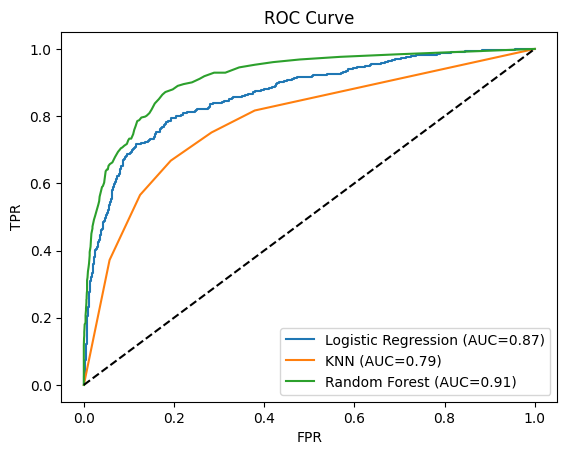

In [ ]:
models = {
    "Logistic Regression": log_model,
    "KNN": knn_smote,
    "Random Forest": RandomForestClassifier().fit(X_train_scaled, y_train)
}

for name, model in models.items():
    y_probs = model.predict_proba(X_test_scaled)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc_score(y_test, y_probs):.2f})")

plt.plot([0, 1], [0, 1], "k--")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC Curve")
plt.legend()
plt.show()


#Conclusion

 - During this project, I realized how important it is to choose the right data cleaning and modeling techniques for real-world machine learning tasks.

 - I also learned how to deal with messy data and situations where one class is much more common than the other, and why it’s important to evaluate models using more than just accuracy.

 - Overall, this project showed me how powerful machine learning can be when it’s combined with real-world knowledge—especially for solving practical problems like those in e-commerce.